### Bjarnason et al, 2009

Bjarnason, R., Fern, A., & Tadepalli, P. (2009). Lower Bounding Klondike Solitaire with Monte-Carlo Planning. Nineteenth International Conference on Automated Planning and Scheduling. Presented at the Nineteenth International Conference on Automated Planning and Scheduling. Retrieved from https://www.aaai.org/ocs/index.php/ICAPS/ICAPS09/paper/view/724

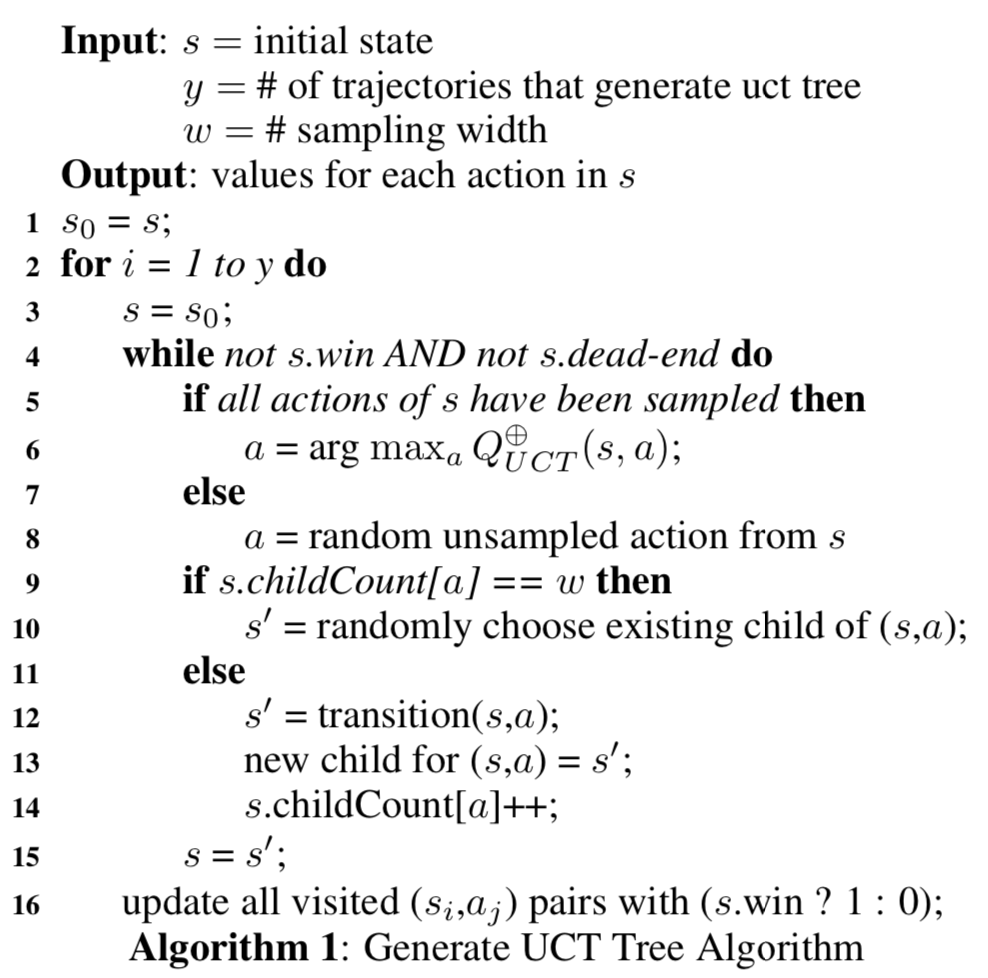

In [3]:
import random
from math import log, sqrt
from collections import defaultdict
from benchmarking import random_state
from gamestate import (
    KlonState, state_is_win, play_move, get_legal_moves,
    state_is_dead_end
)

legal_moves = dict()             # state => set[moves]
sampled_moves = defaultdict(set) # state => set[moves]
children = defaultdict(set)      # state => set[state]
# num times node visited in previous rollouts
n_visits = defaultdict(int)  # state => int
# num times action has been explored in previous rollouts
n_sa = defaultdict(int)  # (state, action) => int
# current action value estimate for each action
Quct = defaultdict(int) # (state, action) => int

def all_actions_sampled(state):
    """ returns bool """
    if state not in legal_moves:
        # have not looked for state's children yet
        legal_moves[state] = get_legal_moves(state)
        # clearly not all sampled
        return False
    all_actions = legal_moves[state]
    sampled = sampled_moves[state]
    return all_actions == sampled

def uct_child(state):
    """ returns action """
    # all actions are sampled by now
    actions = legal_moves[state]
    # return a = argmax_a Q+UCT(s,a)
    log_nvisits = log(n_visits[s])
    def q_uct(a):
        sa = (state, a)
        exploit = Quct[sa]
        explore = sqrt(log_nvisits / n_sa[sa])
        return exploit + explore # explore const c = 1
    return max(actions, key=q_uct)

def random_untried_action(state):
    """ returns action """
    all_actions = legal_moves[state]
    sampled = sampled_moves[state]
    unsampled = all_actions - sampled
    return random.choice(list(unsampled))


import time
start = time.time()
s0 = random_state()
y = 100  # of trajectories that generate uct tree
w = float('inf')  # sampling width
for i in range(y):
    print(i, end=" ")
    s = s0
#     print(f'initial state')
    path = []
    visited = set()
    while not state_is_win(s) and not state_is_dead_end(s):
#         breakpoint()
        if all_actions_sampled(s):
            action = uct_child(s)
        else:
            action = random_untried_action(s)
#         if len(children[s]) == w: # ignore sampling width thing
#         if n_sa[(s, action)] == w:
#             new_state = random.choice(list(children[state]))
#         else:
        new_state = play_move(s, action)
        sampled_moves[s].add(action)
        children[s].add(new_state)
        n_visits[s] += 1
        n_sa[(s, action)] += 1
        s = new_state
        path.append((s, action))
    reward = 1 if state_is_win(s) else 0
    for state, action in path:
        Quct[(state, action)] += reward

end = time.time()
print(f'done in {end-start:.1f}')
print('is win', state_is_win(s))
print('is dead end', state_is_dead_end(s))
print(s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 

KeyboardInterrupt: 